# Step 1: Using Build a CNN — experiment with Fashion-MNIST

- Tip: use early stopping in the validation set
- Tip: use the pipeline mentioned in https://www.tensorflow.org/datasets/keras_example

## Step 1.1: Load the libraries and the fashion mnist dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from keras import activations
from keras import backend as K

In [2]:
# Load data
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Step 1.2: Separate and normalize the training and evaluation data.

In [3]:
# Normalizing training data

#Normalizes images: uint8 -> float32
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [4]:
# Defining testing data
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Step 1.3: Create and train the model.

In [5]:
# Create
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [18]:
# Compile
optimizer = tf.keras.optimizers.Adam(0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = tf.keras.metrics.SparseCategoricalAccuracy() #tf.keras.metrics.Accuracy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
)

In [21]:
# Training
epochs = 100
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
callbacks = [early_stopping_cb]

history = model.fit(
    ds_train,
    epochs=epochs,
    validation_data=ds_test,
    callbacks = callbacks
)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0198 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0723 - val_sparse_categorical_accuracy: 0.9780
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0162 - sparse_categorical_accuracy: 0.9962 - val_loss: 0.0798 - val_sparse_categorical_accuracy: 0.9756
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0140 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0761 - val_sparse_categorical_accuracy: 0.9774
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0123 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0768 - val_sparse_categorical_accuracy: 0.9769
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0097 - sparse_categorical_accuracy: 0.9984 - val_loss: 0.0757 - val_sparse_categorical_accuracy: 0.9775
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.0084 - sparse_cate

## Step 1.4: Evaluate and save model.



In [22]:
# Evaluate
test = model.evaluate(ds_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.0723 - sparse_categorical_accuracy: 0.9780


In [ ]:
# Save model
model_name = "conv_model.h5"
model.save(model_name)

# Step 2: Plot learning curves (loss, validation loss)

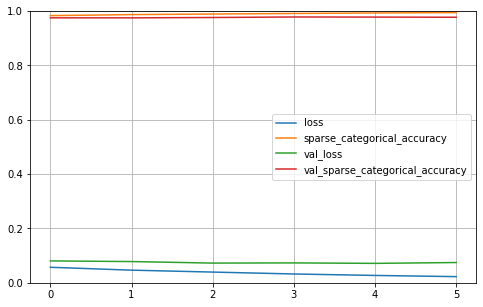

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Step 3: Report the error in the test set

In [25]:
print("Error of the test set is {}".format(test[0]))

Error of the test set is 0.07229411602020264
